# Carbon Emissions Around the World with a focus on the United States

##### Create your virtual environment, ensure you're in the correct directory, and install the requirements.txt.

In [110]:
# Import modules needed to run project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


## Read in the Data

In [111]:
df = pd.read_csv('assets/co2_emissions_kt_by_country.csv')

# Use .info() to get a general idea of what you're working with.
df.info()
# Use .head() to see what data types are present and to get your column headers.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


## Clean the Data

- ##### Drop unnecessary columns for better readability and overall cleanness. We don't need both country name and the country code so let's get rid of the country code.

In [112]:
# ndf= df.drop(columns= 'country_code') ***can accomplish this using code to the left or using inplace= True as shown below. Use inplace if you want to overwright original df.***
df.drop(columns= 'country_code', inplace= True)
# Use .info() to check the dataframe again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  13953 non-null  object 
 1   year          13953 non-null  int64  
 2   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 327.1+ KB


- ##### The "value" column currently rounds to the thousandths place and it isn't entirely necessary for such a simple demonstration and won't significantly distort the data once it's visualized later so let's round the values to the hundredths instead.

In [113]:
df['value'] = df['value'].round(decimals=2)
df.head()

,country_name,year,value
0,Aruba,1960,11092.68
1,Aruba,1961,11576.72
2,Aruba,1962,12713.49
3,Aruba,1963,12178.11
4,Aruba,1964,11840.74


- ##### Rename columns for clarity. The reader won't know what the emissions were measured in based on the value column so let's be make it more accurate. Furthermore, I can format the other columns to achieve a cleaner, more professional look.

In [114]:
# Rename column/columns using ".rename() method". Must format as dict {x:x}. Use "inplace= True" to save in current variable (df). Could also just create new variable (df2) and not include "inplace= True"
df.rename(columns= {'value': 'Carbon Emissions (in kilotons)', 'country_name': 'Country', 'year': 'Year',}, inplace= True)

- ##### Manipulate data for easier visualization later. I've chosen a few countries to highlight for the purposes of this presentation. I've gone ahead and created individual dataframes for them.

In [115]:
# Create df focused solely on USA data. If you read the line of code, then you'll see that we're creating a dataframe using data that is only assoicated with entries that contain "United States."
usa = df[df['Country'].str.contains('United States')]
# Use .info() to determine how much data will be accounted for in the USA-focused dataframe.
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 13209 to 13268
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         60 non-null     object 
 1   Year                            60 non-null     int64  
 2   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [116]:
# Create df for other prominent countries for future comparisons
gbr = df[df['Country'].str.contains('United Kingdom')]
chn = df[df['Country'].str.contains('China')]
can = df[df['Country'].str.contains('Canada')]
mex = df[df['Country'].str.contains('Mexico')]
rus = df[df['Country'].str.contains('Russian Federation')]

In [117]:
# Check to see if dataframes created for the other five countries all have the same amount of rows and columns as our original USA dataframe.
can.info()
chn.info()
gbr.info()
rus.info()
mex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1860 to 1919
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         60 non-null     object 
 1   Year                            60 non-null     int64  
 2   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 2100 to 7845
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         174 non-null    object 
 1   Year                            174 non-null    int64  
 2   Carbon Emissions (in kilotons)  174 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6

- ##### China's dataframe seems to be the only divergent frame in terms of rows and columns.

In [118]:
chn

,Country,Year,Carbon Emissions (in kilotons)
2100,China,1960,780726.30
2101,China,1961,552066.85
2102,China,1962,440359.03
2103,China,1963,436695.70
2104,China,1964,436923.05
...,...,...,...
7841,"Macao SAR, China",2012,1345.79
7842,"Macao SAR, China",2013,1272.45
7843,"Macao SAR, China",2014,1576.81
7844,"Macao SAR, China",2015,2090.19


- ##### It seems as though "China" is included in the country name for multiple points in the original dataframe. I can make a slight modification to the original parameters of the code to ensure that it's stricter in its text selection. I simply change ".contains" to ".match" and it will focus only columns that strictly match "China". By using the code below the chn dataframe is now in line with the other country-specific dataframes created above.


In [119]:
chn = df[df['Country'].str.match('China')]
chn.info()
chn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2100 to 2159
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         60 non-null     object 
 1   Year                            60 non-null     int64  
 2   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


,Country,Year,Carbon Emissions (in kilotons)
2100,China,1960,780726.30
2101,China,1961,552066.85
2102,China,1962,440359.03
2103,China,1963,436695.70
2104,China,1964,436923.05
2105,China,1965,475972.93
2106,China,1966,522789.52
2107,China,1967,433234.05
2108,China,1968,468928.63
2109,China,1969,577237.14


## Analyze the data

- ##### What cursory insights can be gathered from this data?

In [120]:
usa.head()

,Country,Year,Carbon Emissions (in kilotons)
13209,United States,1960,2890696.10
13210,United States,1961,2880505.51
13211,United States,1962,2987207.87
13212,United States,1963,3119230.87
13213,United States,1964,3255995.31


## Visualize the data

##### Plotting the US Two ways

In [121]:
# .plot plotting implementation to visualize a line graph.
# usa.plot.line(x ='Year', rot= 45, y= 'Carbon Emissions (in kilotons)', title = 'United States Carbon Emissions', figsize= (10, 5), grid= True)

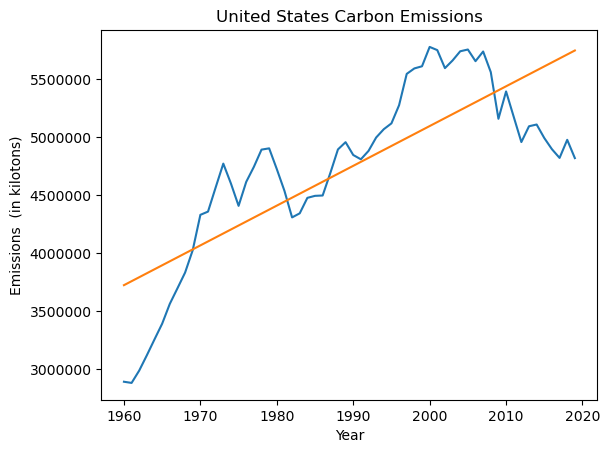

In [122]:
# plt.show implementation to generate same graph differently.
fig, ax = plt.subplots()
ax.plot(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("United States Carbon Emissions")
ax.ticklabel_format(style='plain')
# calculate and plot the trendline using the three lines of code below.
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
ax.plot(usa['Year'], p(usa['Year']))
plt.show()



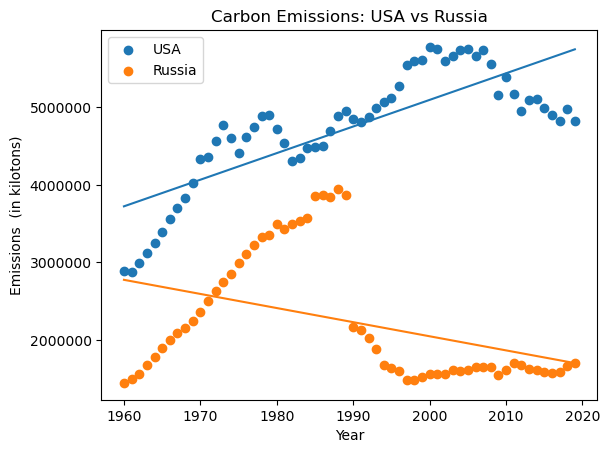

In [123]:
# Comparing USA and Russia emissions with accompanying trendlines.
fig, ax = plt.subplots()
ax.scatter(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.scatter(rus['Year'], rus['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("Carbon Emissions: USA vs Russia")
ax.ticklabel_format(style='plain')
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
zz = np.polyfit(rus['Year'], rus['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
pp = np.poly1d(zz)
ax.plot(usa['Year'], p(usa['Year']))
ax.plot(rus['Year'], pp(rus['Year']))
ax.legend(['USA', 'Russia'])
plt.show()